# Linear Regression and Regularization

In [1]:
import setting_location   # 상위 경로에 있는 module import하기 위한 설정
from preamble import *   # 사용자 정의 모듈 import

### Linear Regression

w[0]: 0.393906  b: -0.031804


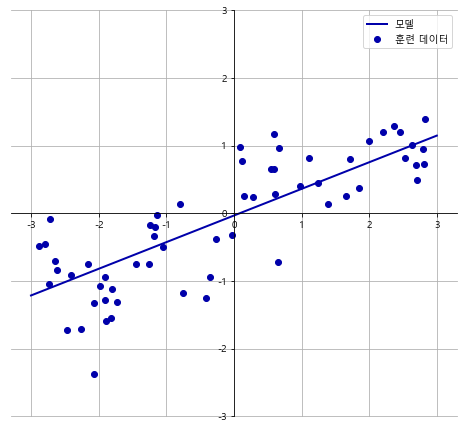

In [2]:
mglearn.plots.plot_linear_regression_wave()

#### OLS

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("coef_: {}".format(lr.coef_))
print("intercept_: {}".format(lr.intercept_))

coef_: [ 0.394]
intercept_: -0.03180434302675973


In [10]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))   # R^2
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

train set score: 0.95
test set score: 0.61


In [7]:
X, y = mglearn.datasets.load_extended_boston()   # Boston housing price 데이터

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [9]:
print("train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test, y_test)))

train set score: 0.95
test set score: 0.61


## Regularization - shirinkage method
### Ridge

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)   # lambda = 1
print("train set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

train set score: 0.89
test set score: 0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)   # lambda = 10
print("train set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

train set score: 0.79
test set score: 0.64


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)   # lambda = 0.1
print("train set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

train set score: 0.93
test set score: 0.77


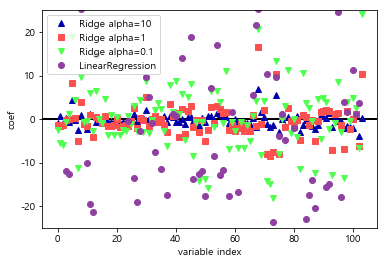

In [16]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("variable index")   # 각 변수
plt.ylabel("coef")   # 각 변수에 해당하는 coefficients
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

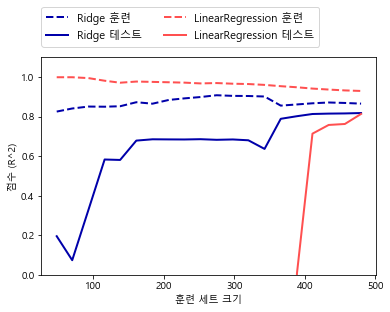

In [17]:
mglearn.plots.plot_ridge_n_samples()

### Lasso (Least Absoulute Shirinkage and Selection Operator)

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))   # LASSO는 dimension reduction => coef가 0인 것이 발생!!

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [19]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [20]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 94


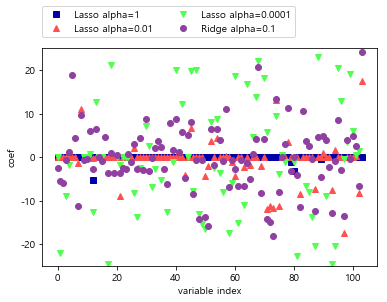

In [22]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("variable index")
plt.ylabel("coef")
plt.show()